# Assignment 06

## Recommender Systems 

## CSCI S-96

> Instructions: For this assignment you will complete the exercises shown. All exercises involve creating and executing some Python code. Additionally, most exercises have questions for you to answer. You can answer questions by creating a Markdown cell and writing your answer. If you are not familiar with Markdown, you can find a brief tutorial here.

## Introduction 

Recommender algorithms are widely used in commerce. Further, the basic algorithms have found applications in other areas. In this Assignment you gain some experience working with the nature of recommender data, the collaborative filtering algorithm and the versions of the nonnegative matrix factorization algorithm.           

This Assignment uses the Python [Surprise](http://surpriselib.com/) package a scikit for recommender system experimentation. You can find further installation instructions on this linked page. If you have not previously installed Surprise uncomment the code in the cell below and execute it.  

In [1]:
## Install the surprise package if it is not already insalled  
## Uncommend the line of code below and exectue this cell
#!pip3 install scikit-surprise

Execute the code in the cell below to import the packages you will need for this assignment. 

In [47]:
from surprise.prediction_algorithms.matrix_factorization import SVD, NMF
from surprise.prediction_algorithms.baseline_only import BaselineOnly
from surprise.prediction_algorithms.knns import KNNBasic
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Load and Explore the Dataset   

In this Assignment you will work with the MovieLens 100k dataset. This dataset includes a total of 100,000 movie ratings from IMDB. 

Before working with recommender algorithms, will explore these data. Exploration of data is an essential step in any data mining process.     

The code in the cell below loads the dataset and splits it into training and testing datasets. Execute this code. If you are asked to if you want to download the data you must answer y. 

In [3]:
## Load the movielens-100k dataset 
## Answer y if you are asked to download the dataset
movie_lense_data = Dataset.load_builtin('ml-100k')

## Split the dataset into training and test subsets.
np.random.seed(4517)
ml_trainset, ml_testset = train_test_split(movie_lense_data, test_size=0.20)

Before experimenting with the recommender algorithms we will explore the data. As a first step of the execute the code in the cell below to print some characteristics of the training dataset.  

In [4]:
print("Number of users = {}".format(ml_trainset.n_users))
print("Number of items = {}".format(ml_trainset.n_items))
print("Number of ratings = {}".format(ml_trainset.n_ratings))

Number of users = 943
Number of items = 1654
Number of ratings = 80000


You can see some basic characteristics of the training dataset. If these data were represented as a rectangular table or matrix they would require, over 1.5 million, and at least that many bytes. In practice, a more efficient representation is used. 

The Surprise package, like all effective recommender software, uses a space efficient representation. The `nr` attribute of the Surprise data object contains a dictionary with the recommender data. The keys of the dictionary are numeric identifiers of the users. The values of this key-value pairs are a list of tuples. The tuples are key value pairs, with the key being the item identifier and the value the rating. In summary, there is a key to value of a key value pair.      

The code in the cell below prints the list of key value, item identifier, rating, value pairs for user identifier 5. Execute this code and examine the results.   

In [5]:
## Print the product-rating tupples in the 'ur' attribute of the data object from user 6
print(len(ml_trainset.ur[5]))
ml_trainset.ur[5]

32


[(5, 4.0),
 (339, 4.0),
 (919, 5.0),
 (169, 4.0),
 (574, 2.0),
 (49, 2.0),
 (563, 2.0),
 (144, 5.0),
 (859, 3.0),
 (650, 1.0),
 (4, 4.0),
 (507, 3.0),
 (75, 2.0),
 (289, 2.0),
 (593, 4.0),
 (348, 2.0),
 (160, 4.0),
 (47, 5.0),
 (34, 3.0),
 (904, 2.0),
 (216, 3.0),
 (407, 3.0),
 (322, 2.0),
 (477, 1.0),
 (349, 3.0),
 (557, 4.0),
 (321, 3.0),
 (372, 3.0),
 (955, 2.0),
 (276, 5.0),
 (1069, 4.0),
 (616, 4.0)]

User 5 has only rated 32 items of 1647 total items.     

> **Exercise 06-1:** To gain some understanding of the nature of the ratings data do the following:    
> 1. In the cell below create and execute code to compute and print the decimal fraction of items rated by user 5 and the decimal fraction of the average number of items rated by all users. Use the attributes of the training dataset to extract the required parameters.  

In [53]:
## Put your code here
fration_user_item = ml_trainset.n_ratings/(ml_trainset.n_items * ml_trainset.n_users)
print('Fraction of items rated by user 5 = {}'.format(len(ml_trainset.ur[5])/ml_trainset.n_items))
print("Fraction of user-item pairs rated = {}".format(fration_user_item))

Fraction of items rated by user 5 = 0.019347037484885126
Fraction of user-item pairs rated = 0.05129119163543247


> 2. Given that real-world online catalogs (products, videos, music, etc.) can contain millions of items, do you think these fractions for an individual user and the average user are realistic or too high? 
> 3. Create two lists with the following values, a) list named `mean_ratings` containing the mean rating of each user, and b) a list named `number_ratings` that contains the count of ratings for each user. The user ratings are represented with a Python dictionary, with key the user identifier in the `ur` attribute of the training dataset. You can extract the keys (user identifiers) with the `keys` method.  
> 4. Once you have completed your code, execute the code in the cell below to display the histograms.  

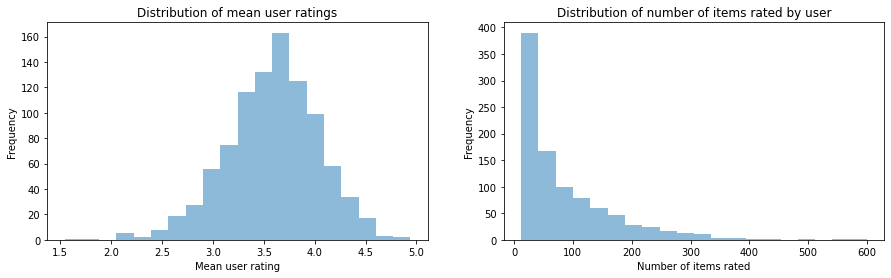

In [56]:
## Compute the mean rating for each of the users in the training dataset
## Put your code here
mean_ratings = []
number_ratings = []
for key in ml_trainset.ur.keys(): 
    number_ratings.append(len(ml_trainset.ur[key]))
    mean_ratings.append(np.mean(np.array(ml_trainset.ur[key], dtype=float)[:,1]))

    
## Create a histograms of the results
fig,ax= plt.subplots(1,2,figsize=(15,4))
_=ax[0].hist(mean_ratings, bins=20, alpha=0.5) 
_=ax[0].set_xlabel('Mean user rating')
_=ax[0].set_ylabel('Frequency')
_=ax[0].set_title('Distribution of mean user ratings')
_=ax[1].hist(number_ratings, bins=20, alpha=0.5) 
_=ax[1].set_xlabel('Number of items rated')
_=ax[1].set_ylabel('Frequency')
_=ax[1].set_title('Distribution of number of items rated by user')

> 5. Is the distribution of the mean user ratings a bit skewed? Do you think this skew is reasonable?   
> 6. Notice the rapid decay in the frequency of items rated by users. Why is this result considered reasonable?  
> **End of exercise.**

## Baseline Only Model

One possible answer to the cold start problem is to use a **baseline only** model. In this model we just use the average or baseline values for users or items to predict ratings. This same approach can be applied to users who consume an item, but provide no rating.

> **Exercise 06-2:** You will now create and evaluate a baseline recommender model. Do the following:   
> 1. Instantiate a [surprise.prediction_algorithms.baseline_only.BaselineOnly](https://surprise.readthedocs.io/en/stable/basic_algorithms.html) model object and it with the `fit` method using the `ml_trainset` as the argument. Name your model object `baseline_model`.  
> 2. Compute the recommender predictions with the `test` method using the `ml_testset` as the argument.   
> 3. Compute and print the RMSE using [surprise.accuracy.rmse](https://surprise.readthedocs.io/en/stable/accuracy.html) and MAE using [surprise.accuracy.mae](https://surprise.readthedocs.io/en/stable/accuracy.html) with the predictions as the argument in both cases.  

In [57]:
## Instantiate the model object and fit to the training data  
# Put your code below
baseline_model = BaselineOnly()
baseline_model.fit(ml_trainset)

## Compute the predicitons from the model 
# Put your code below
predictions = baseline_model.test(ml_testset)

# Compute some model performance statistics
# Put your code below
print(accuracy.rmse(predictions))
print(accuracy.mae(predictions))

Estimating biases using als...
RMSE: 0.9371
0.9370602932201032
MAE:  0.7421
0.742095152987082


> 4. Does the performance of this model seem good given its simplicity?   
> 5. Execute the code in the cell below to display histograms of the item and user biases. 

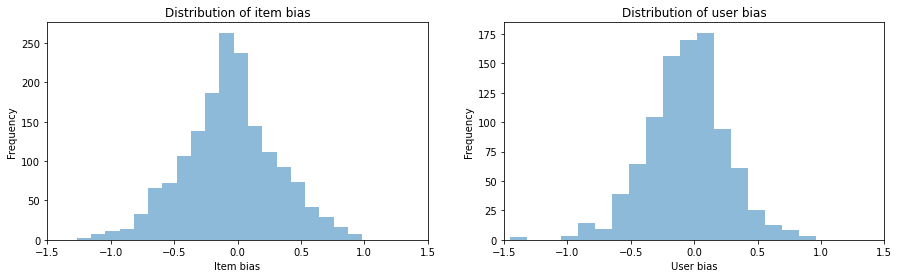

In [61]:
## plot the biases
fig,ax= plt.subplots(1,2,figsize=(15,4))
_=ax[0].hist(baseline_model.bi, bins=20, alpha=0.5) 
_=ax[0].set_xlabel('Item bias')
_=ax[0].set_ylabel('Frequency')
_=ax[0].set_title('Distribution of item bias')
_=ax[0].set_xlim(-1.5,1.5)
_=ax[1].hist(baseline_model.bu, bins=20, alpha=0.5) 
_=ax[1].set_xlabel('User bias')
_=ax[1].set_ylabel('Frequency')
_=ax[1].set_title('Distribution of user bias')
_=ax[1].set_xlim(-1.5,1.5)

> 6. These bias values are approximately Normally distributed, but with somewhat heavy tails. Examine the range of these biases. What does the fact that these ranges are small compared to the range of ratings tell you about the magnitude of the bias adjustments?    
> 7. Ideally, the biases should be uniformly distributed with identifier. In other words, statistically independent of the identifiers. Execute the code to display the relationship.  

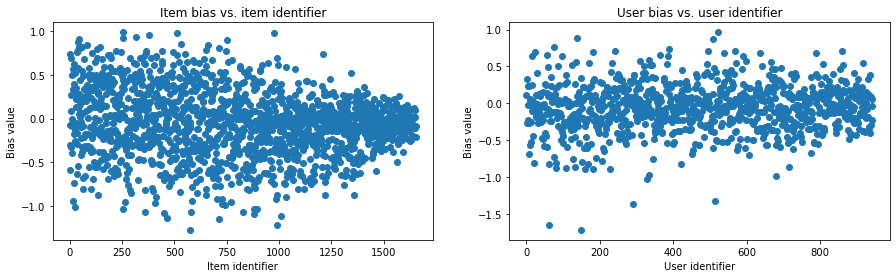

In [59]:
## plot the biases
fig,ax= plt.subplots(1,2,figsize=(15,4))
_=ax[0].scatter(range(len(baseline_model.bi)), baseline_model.bi) 
_=ax[0].set_xlabel('Item identifier')
_=ax[0].set_ylabel('Bias value')
_=ax[0].set_title('Item bias vs. item identifier')
_=ax[1].scatter(range(len(baseline_model.bu)), baseline_model.bu) 
_=ax[1].set_xlabel('User identifier')
_=ax[1].set_ylabel('Bias value')
_=ax[1].set_title('User bias vs. user identifier')

> 8. Examine these plots. Do the distributions look largely uniform with identifier or not?  

## Collaborative Filtering Model  

The collaborative filtering model is an unsupervised learning model using similarity item-item or user-user similarity measures. Items with the highest similarity measures are recommended.  

> **Exercise 06-3:** You will now create and evaluate a baseline recommender model. Do the following:   
> 1. Instantiate a [surprise.prediction_algorithms.knns.KNNBasic](https://surprise.readthedocs.io/en/stable/knn_inspired.html) model object and it with the `fit` method using the `ml_trainset` as the argument. Name your model object `collaborative_filter_model`.  
> 2. Compute the recommender predictions with the `test` method using the `ml_testset` as the argument.   
> 3. Compute and print the RMSE using `surprise.accuracy.rmse and MAE using `surprise.accuracy.mae` with the predictions as the argument in both cases.  

In [28]:
## Instantiate the model object and fit to the training data  
## Put your code here
collaborative_filter_model = KNNBasic()
collaborative_filter_model.fit(ml_trainset)

## Compute the predicitons from the model 
## Put your code here
predictions = collaborative_filter_model.test(ml_testset)

# Compute some model performance statistics
## Put your code here
print(accuracy.rmse(predictions))
print(accuracy.mae(predictions))

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9676
0.9676139209075455
MAE:  0.7636
0.7636210441523836


> 4. Compare the performance of this model to the baseline model. Is it better or worse? Keeping in mind that the rating sampling is more dense that a real-world example, what does this tell you about the effectiveness of a baseline model vs. the model based on similarity.    
> 5. The distribution of the similarities gives insight into the behavior of the model. Execute the code in the to display the histogram of the user-user similarity measures.     

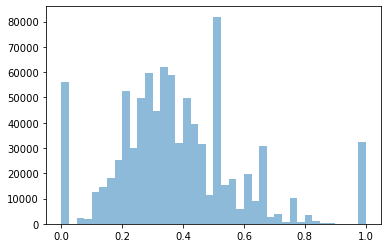

In [26]:
_=plt.hist(collaborative_filter_model.sim.flatten(), bins=40, alpha=0.5)

> 6. Examine the plot. Notice there are a number of similarities which are or are close to 0 or 1. Is the distribution of these similarities skewed? If so, what does this skew tell you about how strong a predictor similarity can be in this case.    
> **End of exercise.**

## Matrix Factorization Methods   

Matrix factorization algorithms are generally considered to be the state of the art for recommenders. The matrix factorization methods find a set of latent (non-observable) factor variable values, which are used to compute rating estimates. Additionally, user and item rating bias adjustments are applied.    

> **Exercise 06-4:** You will now create and evaluate a baseline recommender model. Do the following:   
> 1. Instantiate a [surprise.prediction_algorithms.matrix_factorization.SVD](https://surprise.readthedocs.io/en/stable/matrix_factorization.html) model object and it with the `fit` method using the `ml_trainset` as the argument. Name your model object `collaborative_filter_model`.  
> 2. Compute the recommender predictions with the `test` method using the `ml_testset` as the argument.   
> 3. Compute and print the RMSE using `surprise.accuracy.rmse` and MAE using `surprise.accuracy.mae` with the predictions as the argument in both cases.  

In [29]:
## Instantiate the model object and fit to the training data  
## Put your code here
svd_model = SVD(n_factors=20)
svd_model.fit(ml_trainset)

## Compute the predicitons from the model 
## Put your code here
predictions = svd_model.test(ml_testset)

# Compute some model performance statistics
## Put your code here
print(accuracy.rmse(predictions))
print(accuracy.mae(predictions))

RMSE: 0.9312
0.9311621531226804
MAE:  0.7335
0.7334907616155283


> 4. Compare the performance of this model to the baseline model. Is it better or worse? Keeping in mind that the rating sampling is more dense that a real-world example, what does this tell you about the effectiveness of a baseline model vs. the model based on latent factors.    
> 5. The distribution of the item and factor values gives insight into the behavior of the model. Execute the code in the to display the histograms of the factors for items and users.     

Shape of item factor matrix: (1654, 20)
Shape of user factor matrix: (943, 20)


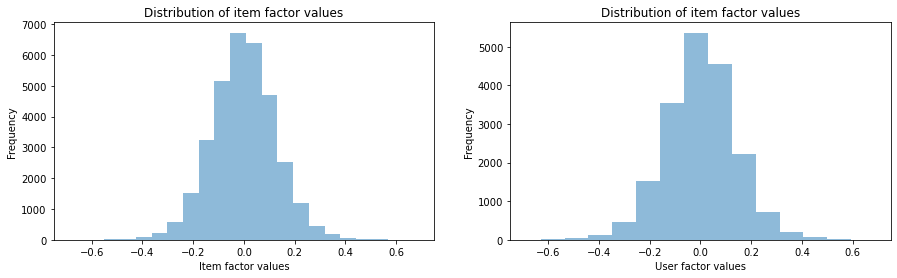

In [62]:
print('Shape of item factor matrix: {}'.format(svd_model.qi.shape))
print('Shape of user factor matrix: {}'.format(svd_model.pu.shape))

## Create a histograms of the factor values
fig,ax= plt.subplots(1,2,figsize=(15,4))
_=ax[0].hist(svd_model.qi.flatten(), bins=20, alpha=0.5) 
_=ax[0].set_xlabel('Item factor values')
_=ax[0].set_ylabel('Frequency')
_=ax[0].set_title('Distribution of item factor values')
_=ax[0].set_xlim(-.75,.75)
_=ax[1].hist(svd_model.pu.flatten(), bins=20, alpha=0.5) 
_=ax[1].set_xlabel('User factor values')
_=ax[1].set_ylabel('Frequency')
_=ax[1].set_title('Distribution of user factor values')
_=ax[1].set_xlim(-.75,.75)

> 6. Notice the compact representation of the factors computed. Do you expect this representation to be compact compared to the original data set?     
> 7. Examine the distribution of the factor values. Compare these values to the distribution of bias values for the Baseline model. What does the fact that these ranges are small compared to the range of bias values tell you about the effect these values will have on the predictions of the latent variable model?     
> **End of exercise.**

#### Copyright 2021, Stephen F Elston. All rights reserved. 